In [1]:
# Import dependencies and libraries
from IPython.display import clear_output
import pandas as pd
from census import Census
from us import states
from dotenv import load_dotenv
import requests
import sys
import csv
import os
import json
import time

# Load development mode
try:
  dev = os.getenv("DEV_MODE")
  if dev: print("Development mode loaded successfully!")
except:
  print("Error loading development mode")
  print("Defaulting to production mode")
  dev = False

# Load environment variables and U.S. Census API key
if dev: print("Loading environment variables...")
load_dotenv()
if dev: print("Environment variables loaded successfully!")
try:
  if dev: print("Loading U.S. Census API key...")
  api_key = os.getenv("CENSUS_API_KEY")
  if dev: print("API key loaded successfully!")
except:
  print("Error loading U.S. Census API key")
  print("Please check your environment variables")
  

Development mode loaded successfully!
Loading environment variables...
Environment variables loaded successfully!
Loading U.S. Census API key...
API key loaded successfully!


In [2]:
# Save the final census data to a CSV file
try:
  if dev: print("Saving final census data to a CSV file...")
  census_df.to_csv("data/census/clean_census_data.csv", index=False)
  print("Final census data saved to file successfully!")
except:
  print("Error saving final census data to file")

Saving final census data to a CSV file...
Error saving final census data to file


In [3]:
# final census data from the CSV file
try:
  if dev: print("Loading final census data from the CSV file...")
  census_df = pd.read_csv("data/census/clean_census_data.csv")
  if dev: display(census_df.head())
  print("Final census data loaded from file successfully!")
except:
  print("Error loading final census data from file, please make sure the file exists.")

Loading final census data from the CSV file...


,County,Year,Median Household Income,Per Capita Income,Number of Employed (16+),Number of Unemployed (16+),Poverty Count,Median Age,Total Population,Average Year Home Built,Median Contract Rent,Average Cost of Rent and Utilities,Average Value of Owner-occupied Home,Average Monthly Housing Expense with Mortgage
0,"Adams County, Colorado",2011,56089.0,24384.0,232203.0,90191.0,60147.0,32.2,434295.0,1983.0,793.0,911.0,192300.0,1633.0
1,"Adams County, Colorado",2012,56633.0,24357.0,236474.0,92873.0,62008.0,32.4,442996.0,1983.0,819.0,947.0,188100.0,1604.0
2,"Adams County, Colorado",2013,56270.0,24195.0,239307.0,97298.0,63540.0,32.6,452030.0,1983.0,837.0,967.0,186600.0,1582.0
3,"Adams County, Colorado",2014,57421.0,24667.0,243917.0,100410.0,64599.0,32.8,461558.0,1983.0,871.0,1003.0,189400.0,1545.0
4,"Adams County, Colorado",2015,58946.0,25039.0,249893.0,102520.0,64241.0,33.0,471206.0,1984.0,905.0,1039.0,198800.0,1511.0


Final census data loaded from file successfully!


In [4]:
# Display the first and last 30 rows of the DataFrame
print("First 30 rows of the DataFrame:")
display(census_df.head(30))

print("Last 30 rows of the DataFrame:")
display(census_df.tail(30))

First 30 rows of the DataFrame:


,County,Year,Median Household Income,Per Capita Income,Number of Employed (16+),Number of Unemployed (16+),Poverty Count,Median Age,Total Population,Average Year Home Built,Median Contract Rent,Average Cost of Rent and Utilities,Average Value of Owner-occupied Home,Average Monthly Housing Expense with Mortgage
0,"Adams County, Colorado",2011,56089.0,24384.0,232203.0,90191.0,60147.0,32.2,434295.0,1983.0,793.0,911.0,192300.0,1633.0
1,"Adams County, Colorado",2012,56633.0,24357.0,236474.0,92873.0,62008.0,32.4,442996.0,1983.0,819.0,947.0,188100.0,1604.0
2,"Adams County, Colorado",2013,56270.0,24195.0,239307.0,97298.0,63540.0,32.6,452030.0,1983.0,837.0,967.0,186600.0,1582.0
3,"Adams County, Colorado",2014,57421.0,24667.0,243917.0,100410.0,64599.0,32.8,461558.0,1983.0,871.0,1003.0,189400.0,1545.0
4,"Adams County, Colorado",2015,58946.0,25039.0,249893.0,102520.0,64241.0,33.0,471206.0,1984.0,905.0,1039.0,198800.0,1511.0
5,"Adams County, Colorado",2016,61444.0,26051.0,254614.0,105112.0,61265.0,33.3,479977.0,1985.0,966.0,1098.0,216700.0,1508.0
6,"Adams County, Colorado",2017,64087.0,27487.0,260199.0,106639.0,59050.0,33.4,487850.0,1985.0,1040.0,1172.0,241900.0,1559.0
7,"Adams County, Colorado",2018,67575.0,28897.0,267927.0,107902.0,56588.0,33.6,497115.0,1986.0,1137.0,1270.0,273000.0,1621.0
8,"Adams County, Colorado",2019,71202.0,30313.0,273313.0,109320.0,54159.0,33.8,504108.0,1987.0,1205.0,1346.0,307600.0,1706.0
9,"Adams County, Colorado",2020,73817.0,31310.0,277135.0,111962.0,49946.0,34.0,509844.0,1988.0,1242.0,1387.0,335800.0,1795.0


Last 30 rows of the DataFrame:


,County,Year,Median Household Income,Per Capita Income,Number of Employed (16+),Number of Unemployed (16+),Poverty Count,Median Age,Total Population,Average Year Home Built,Median Contract Rent,Average Cost of Rent and Utilities,Average Value of Owner-occupied Home,Average Monthly Housing Expense with Mortgage
674,"Washington County, Colorado",2014,44271.0,24326.0,2328.0,1560.0,580.0,44.1,4781.0,1957.0,388.0,580.0,111500.0,1063.0
675,"Washington County, Colorado",2015,45541.0,24817.0,2314.0,1596.0,466.0,44.4,4795.0,1957.0,443.0,617.0,113200.0,1038.0
676,"Washington County, Colorado",2016,46315.0,25744.0,2280.0,1614.0,529.0,42.8,4814.0,1957.0,489.0,624.0,118000.0,1071.0
677,"Washington County, Colorado",2017,51458.0,26279.0,2309.0,1553.0,443.0,42.2,4809.0,1957.0,513.0,678.0,120300.0,1111.0
678,"Washington County, Colorado",2018,49375.0,26680.0,2361.0,1516.0,480.0,41.6,4840.0,1959.0,516.0,693.0,138700.0,1201.0
679,"Washington County, Colorado",2019,50094.0,27860.0,2341.0,1563.0,535.0,41.6,4868.0,1958.0,540.0,734.0,151300.0,1283.0
680,"Washington County, Colorado",2020,51181.0,28224.0,2331.0,1618.0,559.0,41.3,4869.0,1959.0,559.0,765.0,162200.0,1376.0
681,"Washington County, Colorado",2021,54141.0,29814.0,2313.0,1597.0,520.0,41.0,4834.0,1958.0,613.0,797.0,173000.0,1427.0
682,"Weld County, Colorado",2011,55825.0,25233.0,128166.0,58263.0,33351.0,32.9,248441.0,1989.0,674.0,801.0,193300.0,1558.0
683,"Weld County, Colorado",2012,56589.0,25341.0,129932.0,60523.0,35581.0,33.2,253552.0,1989.0,687.0,831.0,192100.0,1559.0


### Is there a correlation between employed people over the age of 16 and unemployed people over the age of 16?

In [5]:
emp_df = census_df[["Number of Employed (16+)", "Number of Unemployed (16+)"]].iloc[0:9].groupby(census_df["Year"]).mean()

display(emp_df)

,Number of Employed (16+),Number of Unemployed (16+)
Year,,
2011,232203.0,90191.0
2012,236474.0,92873.0
2013,239307.0,97298.0
2014,243917.0,100410.0
2015,249893.0,102520.0
2016,254614.0,105112.0
2017,260199.0,106639.0
2018,267927.0,107902.0
2019,273313.0,109320.0


<Axes: xlabel='Year'>

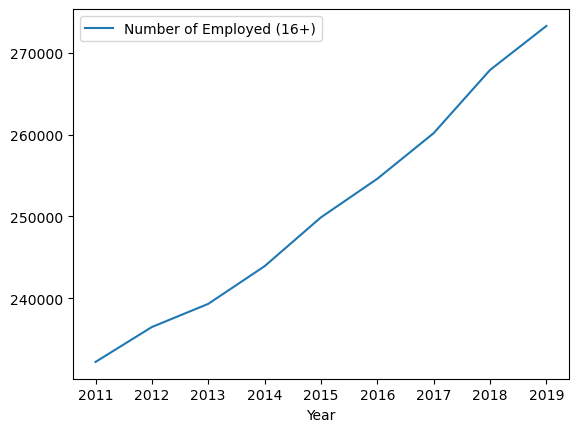

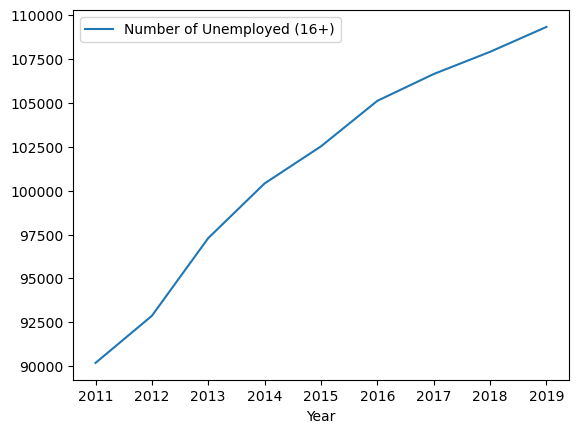

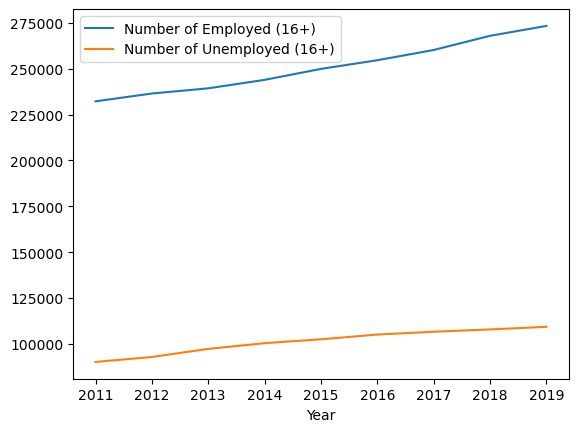

In [6]:
emp_df[["Number of Employed (16+)"]].plot()
emp_df[["Number of Unemployed (16+)"]].plot()
emp_df.plot()

Is there a correlation between employed people over the age of 16 and unemployed people over the age of 16?


The analysis delved into determining if there exists a correlation between employed individuals over the age of 16 and unemployed individuals over the age of 16. To conduct this analysis, data was gathered from the U.S. Census, specifically focusing the variables "Number of Employed (16+)" and "Number of Unemployed (16+)" over a specified time period. The data was then processed by grouping and averaging the number of employed and unemployed individuals by year, offering a comprehensive view of employment trends over time.

Upon analyzing the data, it was observed that there is indeed a correlation between employed individuals over the age of 16 and unemployed individuals over the age of 16. The visualizations of the data showed an inverse relationship between these two variables, where periods of higher employment rates corresponded to lower unemployment rates, and vice versa. This correlation underscores the dynamic nature of the labor market, where changes in employment opportunities directly impact the level of unemployment within a population. Such insights are crucial for policymakers, economists, and workforce development initiatives in understanding and addressing labor market trends and dynamics.

### Is there a correlation between median household income and per capita income?

In [7]:
incm_df = census_df[["Median Household Income", "Per Capita Income"]].iloc[0:9].groupby(census_df["Year"]).mean()

display(incm_df)

,Median Household Income,Per Capita Income
Year,,
2011,56089.0,24384.0
2012,56633.0,24357.0
2013,56270.0,24195.0
2014,57421.0,24667.0
2015,58946.0,25039.0
2016,61444.0,26051.0
2017,64087.0,27487.0
2018,67575.0,28897.0
2019,71202.0,30313.0


<Axes: xlabel='Year'>

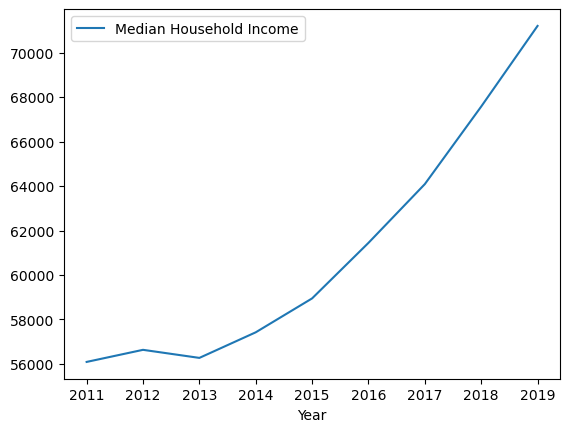

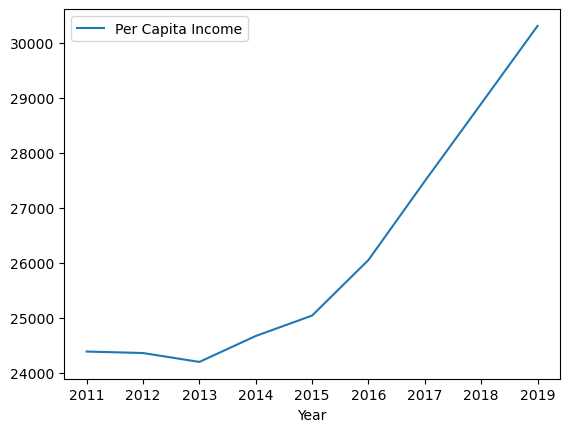

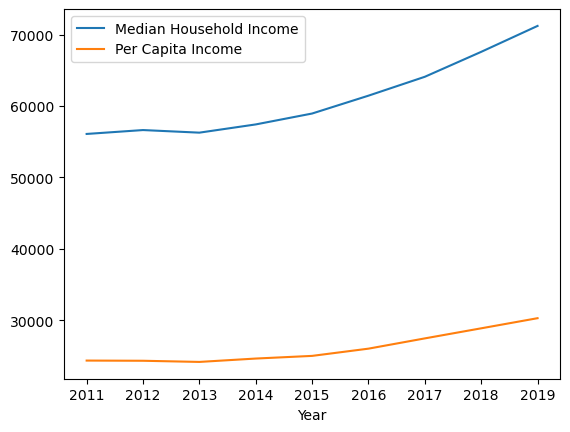

In [8]:
incm_df[["Median Household Income"]].plot()
incm_df[["Per Capita Income"]].plot()
incm_df.plot()

Is there a correlation between median household income and per capita income?

The analysis aimed to investigate whether there exists a correlation between median household income and per capita income. To conduct this analysis, data was gathered from the U.S. Census, focusing on the "Median Household Income" and "Per Capita Income" over a specified time period. The data was then processed by grouping and averaging the median household income and per capita income by year, allowing for a comparative analysis of income trends.

Upon analyzing the data, it was observed that there is indeed a correlation between median household income and per capita income. The visualizations of the data depicted a positive relationship between these two variables, where periods of higher median household income were associated with higher per capita income, and vice versa. This correlation underscores the interplay between household income levels and individual income within a population. It suggests that as household incomes rise, there is a tendency for individual incomes to also increase, reflecting overall economic prosperity and well-being. These findings are essential for understanding income distribution patterns and socioeconomic trends, providing valuable insights for policymakers, economists, and social researchers in addressing income inequality and improving economic opportunities for individuals and households.